In [45]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional


# Definir EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10  # Cambiado de 25 a 10
)
# Definir el número de ejemplos que deseas usar
num_samples = 500

# Obtener índices aleatorios de manera eficiente
indices = np.random.choice(train_X.shape[0], num_samples, replace=False)

# Crear subconjuntos
train_X_subset = train_X[indices]
train_y_subset = train_y[indices]

# Crear un pipeline de datos usando tf.data
train_dataset = tf.data.Dataset.from_tensor_slices((train_X_subset, train_y_subset))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64).prefetch(tf.data.experimental.AUTOTUNE)

history = model.fit(
    train_dataset,
    validation_data=(val_X, val_y),
    epochs=3,  # Cambiado a 5 épocas
    batch_size=4096,  # Cambiado de 4096 a 64
    callbacks=[early_stop],
    verbose=1  # Cambiado a 1 para ver el progreso
)

print("MODEL SUMMARY")
print("==========================")

model.summary()

Epoch 1/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - loss: 0.5616 - mae: 0.5157 - val_loss: 0.6329 - val_mae: 0.5353
Epoch 2/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - loss: 0.5701 - mae: 0.5207 - val_loss: 0.6269 - val_mae: 0.5345
Epoch 3/3
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - loss: 0.6299 - mae: 0.5459 - val_loss: 0.6296 - val_mae: 0.5277
MODEL SUMMARY


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 30, 100)        │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 30, 100)        │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 100)            │        60,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         3,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 435,191 (1.66 MB)

 Trainable params: 145,063 (566.65 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 290,128 (1.11 MB)

In [39]:
# Parte 18 

#Defines Model Architecture
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam

# Definir el modelo
model = Sequential([
    Bidirectional(LSTM(50, dropout=0.3, return_sequences=True, input_shape=(30, 1))),  # Capa 1
    Bidirectional(LSTM(50, dropout=0.3, return_sequences=True)),  # Capa 2
    Bidirectional(LSTM(50, dropout=0.3)),  # Capa 3
    Dense(32, activation='relu'),  # Capa 4
    Dropout(0.5),  # Capa 5
    Dense(7)  # Capa de salida
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


C:\Users\andre\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
# Parte 15 

#from sklearn.preprocessing import StandardScaler

#train_meta_data = np.array(train_meta_data)
#test_meta_data = np.array(test_meta_data)
#val_meta_data = np.array(val_meta_data)

#ss_meta = StandardScaler()
#train_meta_data = ss_meta.fit_transform(train_meta_data)
#test_meta_data = ss_meta.transform(test_meta_data)
#val_meta_data = ss_meta.transform(val_meta_data)

# 2. Scale Data
aqi_mean = np.array(train_windows).mean() #mean of training set
aqi_std = np.array(train_windows).std() #standard deviation of training set

#scales data
train_windows = (np.array(train_windows) - aqi_mean) / aqi_std
test_windows = (np.array(test_windows) - aqi_mean) / aqi_std
val_windows = (np.array(val_windows) - aqi_mean) / aqi_std


# 3. Split Into X and y
train_X = train_windows[:, :-7]
train_X = train_X.reshape(train_X.shape[0], 30, 1)
train_y = train_windows[:, -7:]

test_X = test_windows[:, :-7]
test_X = test_X.reshape(test_X.shape[0], 30, 1)
test_y = test_windows[:, -7:]

val_X = val_windows[:, :-7]
val_X = val_X.reshape(val_X.shape[0], 30, 1)
val_y = val_windows[:, -7:]


#display a sample of data
print("SAMPLE OF PREPROCCESED DATA SET")
print("======================================")
print("X:", train_X[0])
print("y:", train_y[0])

SAMPLE OF PREPROCCESED DATA SET
X: [[-0.74127998]
 [-0.69626552]
 [-0.60623662]
 [-0.87632334]
 [-0.96635224]
 [-1.23643896]
 [-0.56122217]
 [-0.78629443]
 [-0.78629443]
 [-0.87632334]
 [-0.83130888]
 [-0.78629443]
 [-1.1013956 ]
 [-0.60623662]
 [-0.47119326]
 [-0.78629443]
 [-0.87632334]
 [-0.69626552]
 [-0.83130888]
 [-0.60623662]
 [-0.74127998]
 [-0.56122217]
 [-0.60623662]
 [-0.96635224]
 [-0.87632334]
 [-1.23643896]
 [-0.74127998]
 [-0.51620771]
 [-0.47119326]
 [-0.47119326]]
y: [-0.3361499  -0.47119326 -0.74127998 -0.74127998 -0.56122217 -0.60623662
 -0.24612099]


In [47]:
from concurrent.futures import ThreadPoolExecutor
import threading
import pandas as pd
import numpy as np
from datetime import timedelta

# Inicializar listas globales
train_windows = []
test_windows = []
val_windows = []

# Función que procesa cada índice de `cbsa_grp`
def process_cbsa(i):
    local_train_windows = []
    local_test_windows = []
    local_val_windows = []
    
    cbsa = cbsa_grp.index[i]
    temp_df = aqi_data[aqi_data['CBSA Code'] == cbsa]
    temp_df.index = pd.to_datetime(temp_df['Date'])

    temp_df = temp_df.loc[:, 'AQI']  # Obtener valores de AQI

    start_date = temp_df.index.min()  # Primera medición
    end_date = temp_df.index.max()    # Última medición

    # Rellenar fechas faltantes con np.NaN
    new_index = pd.date_range(start_date, end_date, freq='D')
    filler_aqi = [np.NaN for _ in new_index]

    filler = pd.DataFrame({'Fill_AQI': filler_aqi}, index=new_index)
    temp = filler.join(temp_df)

    aqi_vals = temp.AQI.values
    ix = 0

    # Procesar ventanas de 37 días
    while ix < aqi_vals.shape[0] - 37:
        window = aqi_vals[ix: ix + 37]

        # Validar ventanas sin valores faltantes
        if (np.isnan(window).sum() == 0) and ((start_date + timedelta(days=ix)).year > 2011):
            curr_time = start_date + timedelta(days=ix)

            # Clasificar datos en conjuntos
            if curr_time.year == 2021:
                if curr_time.month > 6:
                    local_test_windows.append([w if w <= 500 else 500 for w in window])
                else:
                    local_val_windows.append([w if w <= 500 else 500 for w in window])
            else:
                local_train_windows.append([w if w <= 500 else 500 for w in window])
        ix += 1

    return local_train_windows, local_val_windows, local_test_windows

# Función que incluye el registro del hilo actual
def process_cbsa_debug(i):
    print(f"Procesando índice {i} en hilo: {threading.current_thread().name}")
    return process_cbsa(i)

# Ejecutar paralelización
num_threads = 16
with ThreadPoolExecutor(max_workers=num_threads) as executor:
    results = list(executor.map(process_cbsa_debug, range(cbsa_grp.shape[0])))

# Consolidar resultados
for train, val, test in results:
    train_windows.extend(train)
    val_windows.extend(val)
    test_windows.extend(test)

# Mostrar resultados
print('NUMBER OF TRAINING DATA SAMPLES:', len(train_windows))
print('NUMBER OF VALIDATION DATA SAMPLES:', len(val_windows))
print('NUMBER OF TESTING DATA SAMPLES:', len(test_windows))


Procesando índice 0 en hilo: ThreadPoolExecutor-7_0
Procesando índice 1 en hilo: ThreadPoolExecutor-7_1
Procesando índice 2 en hilo: ThreadPoolExecutor-7_2
Procesando índice 3 en hilo: ThreadPoolExecutor-7_3
Procesando índice 4 en hilo: ThreadPoolExecutor-7_4
Procesando índice 5 en hilo: ThreadPoolExecutor-7_5
Procesando índice 6 en hilo: ThreadPoolExecutor-7_6
Procesando índice 7 en hilo: ThreadPoolExecutor-7_7
Procesando índice 8 en hilo: ThreadPoolExecutor-7_8
Procesando índice 9 en hilo: ThreadPoolExecutor-7_0
Procesando índice 10 en hilo: ThreadPoolExecutor-7_9
Procesando índice 11 en hilo: ThreadPoolExecutor-7_1
Procesando índice 12 en hilo: ThreadPoolExecutor-7_2
Procesando índice 13 en hilo: ThreadPoolExecutor-7_11
Procesando índice 14 en hilo: ThreadPoolExecutor-7_10
Procesando índice 15 en hilo: ThreadPoolExecutor-7_3
Procesando índice 16 en hilo: ThreadPoolExecutor-7_4
Procesando índice 17 en hilo: ThreadPoolExecutor-7_12
Procesando índice 18 en hilo: ThreadPoolExecutor-7_14

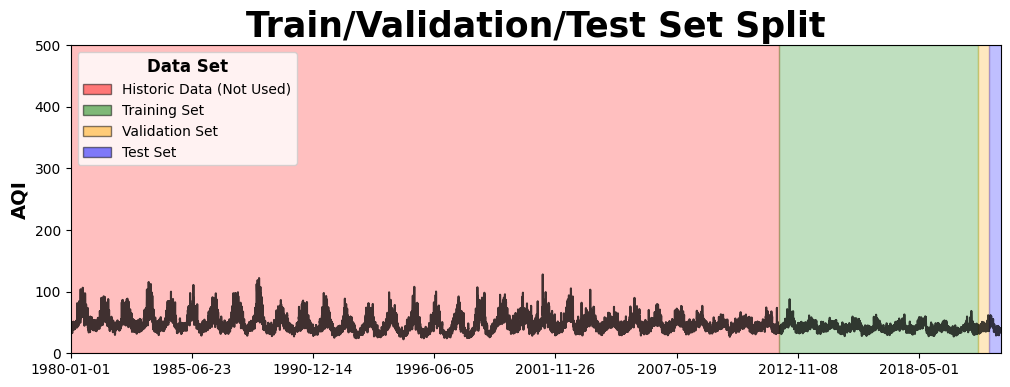

In [36]:
# Parte 13 

#plots the split of training, validation, and training data

aqi_all_usa.plot(figsize=(12,4), color='black', alpha=0.75)
plt.title('Train/Validation/Test Set Split', {'size': 25, 'weight': 'bold'})

# adds color patches 
historic = plt.Rectangle((-1_000,0), 12_688, 500, fc='red',ec="red", alpha=0.25)
train = plt.Rectangle((11_688,0), 3_287, 500, fc='green',ec="green", alpha=0.25)
validation = plt.Rectangle((14_975,0), 188, 500, fc='orange',ec="orange", alpha=0.25)
test = plt.Rectangle((15_163,0), 17_500, 500, fc='blue',ec="blue", alpha=0.25)


plt.gca().add_patch(historic)
plt.gca().add_patch(train)
plt.gca().add_patch(validation)
plt.gca().add_patch(test)


plt.xlabel('')
plt.ylabel('AQI', {'size': 14, 'weight': 'bold'})

plt.ylim(0, 500)
plt.xlim(0, 15_350)

#Sets up legend

legend_elements = [
    Patch(facecolor='red', edgecolor='black', alpha=0.5, label='Historic Data (Not Used)'),
    Patch(facecolor='green', edgecolor='black', alpha=0.5, label='Training Set'),
    Patch(facecolor='orange', edgecolor='black', alpha=0.5, label='Validation Set'),
    Patch(facecolor='blue', edgecolor='black', alpha=0.5, label='Test Set')
                  ]


legend = plt.legend(handles=legend_elements)
legend.set_title("Data Set", prop = {'size':12, 'weight': 'bold'})

#displays the plot
plt.show()


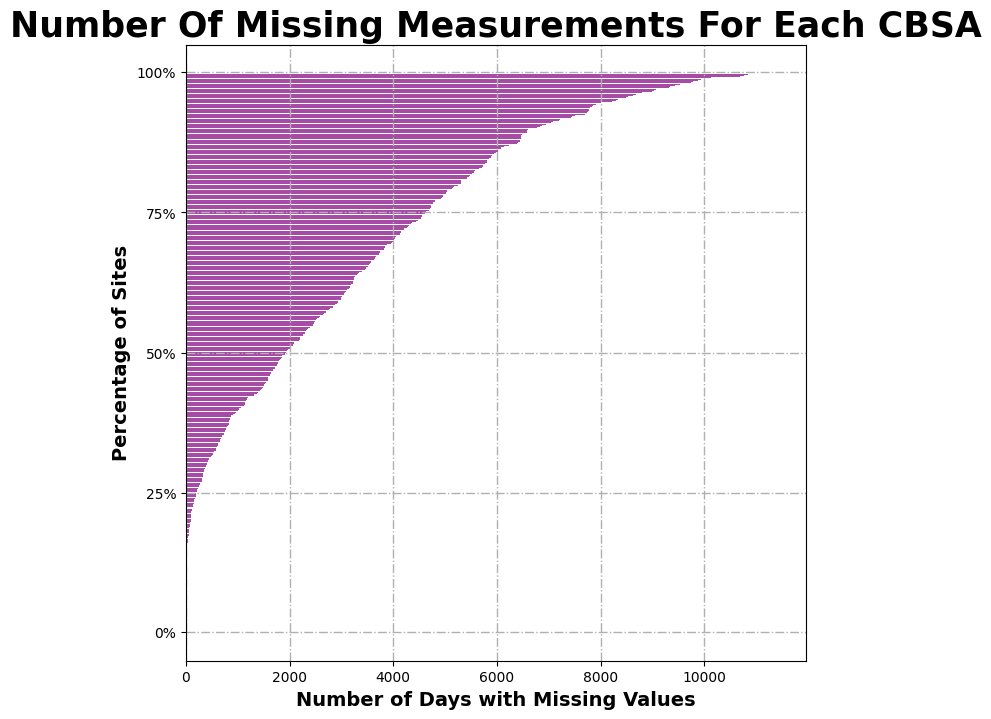

In [35]:
# Parte 12 

#This cell plots the number of missing measurements for each sensor
plt.figure(figsize=(8, 8))

plt.barh(range(671),
         ((cbsa_grp['End'] - cbsa_grp['Start']) - cbsa_grp[('Date', 'count')]+1).sort_values().values,
        color='purple', alpha=0.7)

plt.yticks([671, int(671*0.75), int(671*0.5), int(671*0.25), 0],
           ['100%', '75%', '50%', '25%', '0%'])
plt.ylabel('Percentage of Sites', {'size': 14, 'weight': 'bold'})
plt.xlabel('Number of Days with Missing Values', {'size': 14, 'weight': 'bold'})

plt.grid(axis='both', lw=1, linestyle='-.')
plt.title('Number Of Missing Measurements For Each CBSA', {'size': 25, 'weight': 'bold'})
plt.show()

Number of groups in CBSA: 671


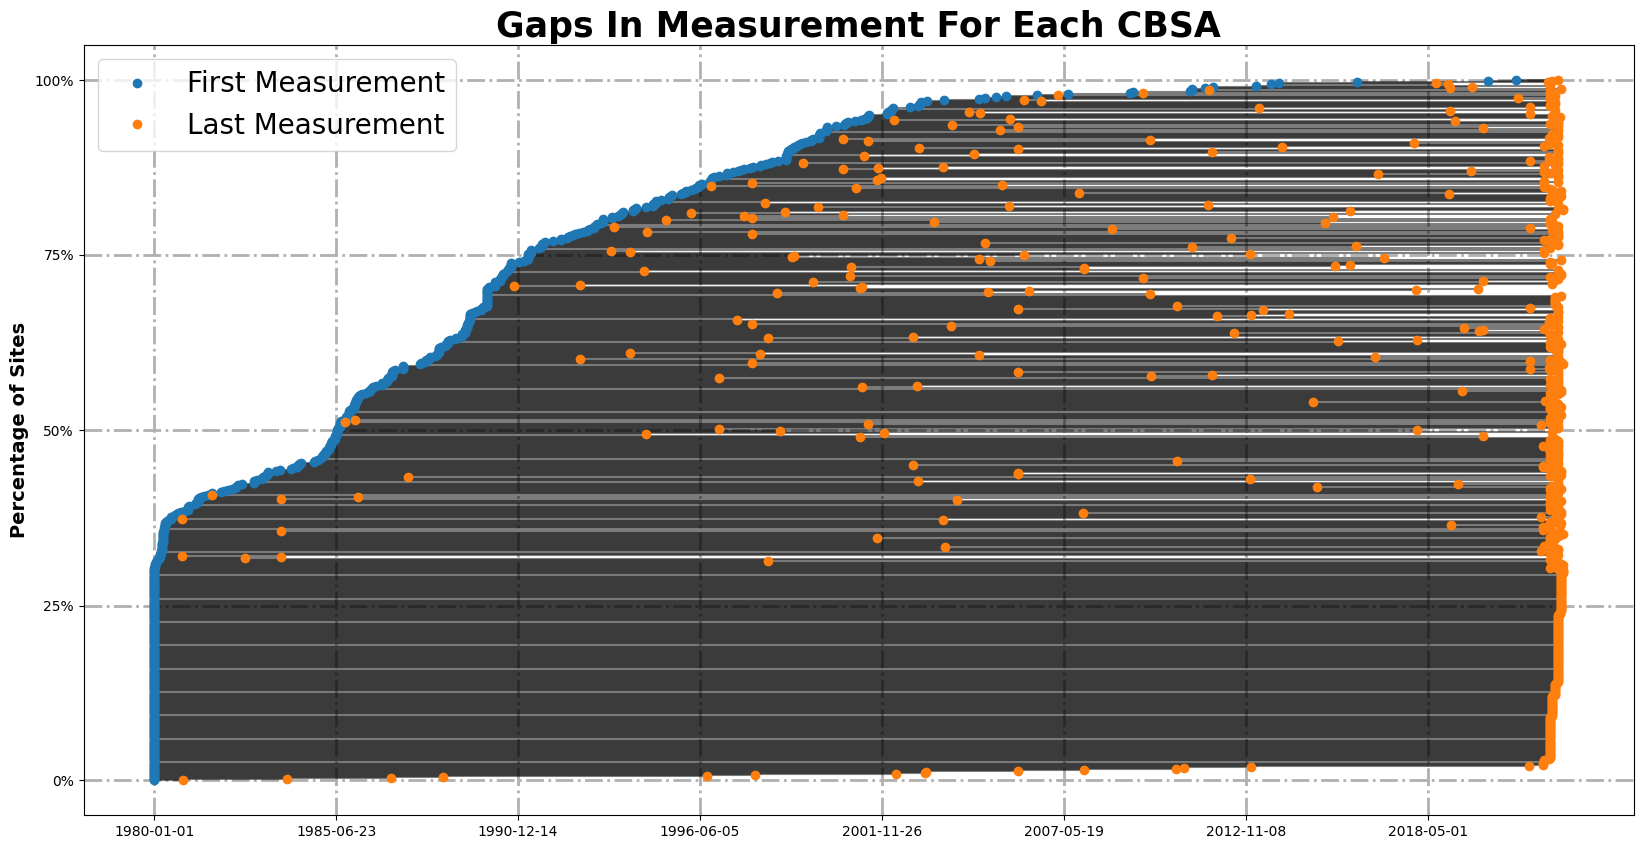

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

# Cargar los datos (ajusta la ruta si es necesario)
# aqi_data = pd.read_csv(r"C:\Users\andre\OneDrive\Documentos\TrabajoFinal-Grupo4CNN\US_AQI.csv", index_col=0)

# Agrupar por 'CBSA Code' y obtener el primer, último y el número de mediciones
cbsa_grp = aqi_data.groupby('CBSA Code').agg({'Date': ['min', 'max', 'count']})

# Convertir las fechas a formato datetime
mins = pd.to_datetime(cbsa_grp[('Date', 'min')])
maxs = pd.to_datetime(cbsa_grp[('Date', 'max')])
min_date = mins.min()

# Calcular las diferencias en días desde la primera fecha
a = mins - min_date
b = maxs - min_date
a = a.dt.days
b = b.dt.days

# Añadir columnas de inicio y fin
cbsa_grp['Start'] = a
cbsa_grp['End'] = b

# Ordenar por las fechas de inicio y fin
cbsa_grp = cbsa_grp.sort_values(['Start', 'End'], ascending=True)

# Verifica cuántos elementos tiene cbsa_grp
num_sites = len(cbsa_grp)
print(f"Number of groups in CBSA: {num_sites}")

# Crear la figura
plt.figure(figsize=(20, 10))

# Graficar las líneas horizontales, usando el número real de sitios
plt.hlines(range(num_sites), xmin=cbsa_grp['Start'],
            xmax=cbsa_grp['End'], color='black', 
            alpha=0.5)

# Graficar las marcas de las primeras y últimas mediciones
plt.plot(cbsa_grp['Start'], range(num_sites), "o", label='First Measurement')
plt.plot(cbsa_grp['End'], range(num_sites), "o", label='Last Measurement')

# Ajustar las etiquetas en el eje y
plt.yticks([num_sites-1, int(num_sites*0.75), int(num_sites*0.5), int(num_sites*0.25), 0],
           ['100%', '75%', '50%', '25%', '0%'])

# Ajustar las etiquetas en el eje x
plt.xticks(range(0, 16_000, 2_000), 
           [str(min_date + timedelta(days=days))[:10] for days in range(0, 16_000, 2_000)])

# Etiquetas y título
plt.ylabel('Percentage of Sites', {'size': 14, 'weight': 'bold'})
plt.legend(fontsize=20)
plt.grid(axis='both', lw=2, linestyle='-.')

plt.title('Gaps In Measurement For Each CBSA', {'size': 25, 'weight': 'bold'})

# Mostrar la gráfica
plt.show()


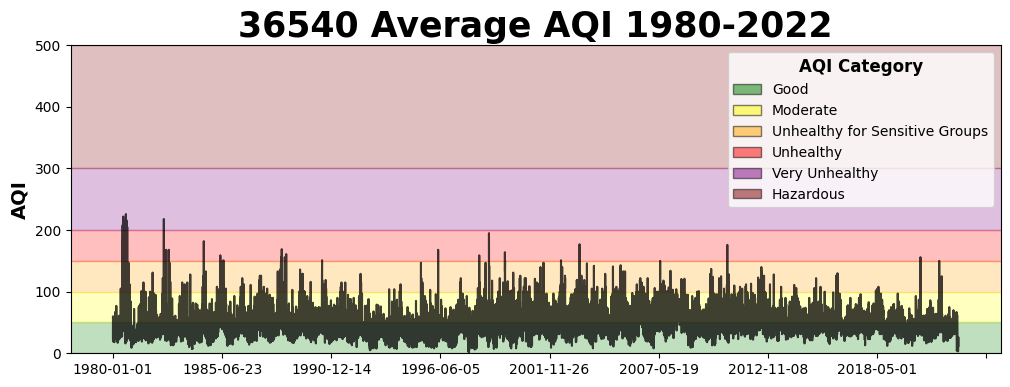

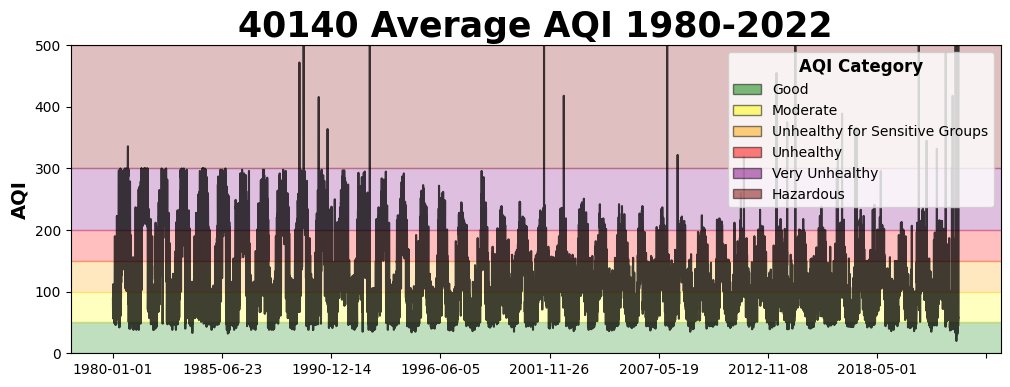

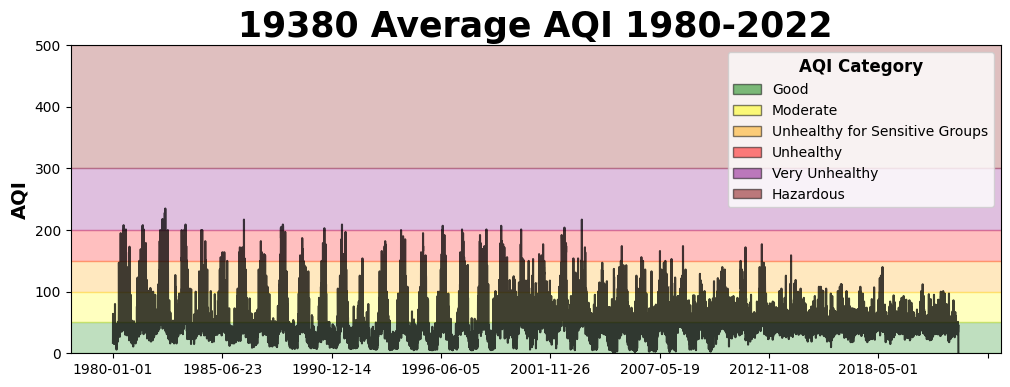

In [33]:
#Makes dataframe of AQI by cbsa code
aqi_by_cbsa = aqi_data.groupby(['CBSA Code', 'Date']).AQI.mean()

#plots AQI for each cbsa code listed
for cbsa in [36540, 40140, 19380]:
    make_aqi_by_area_plot(aqi_by_cbsa, cbsa, clip_dates=False)


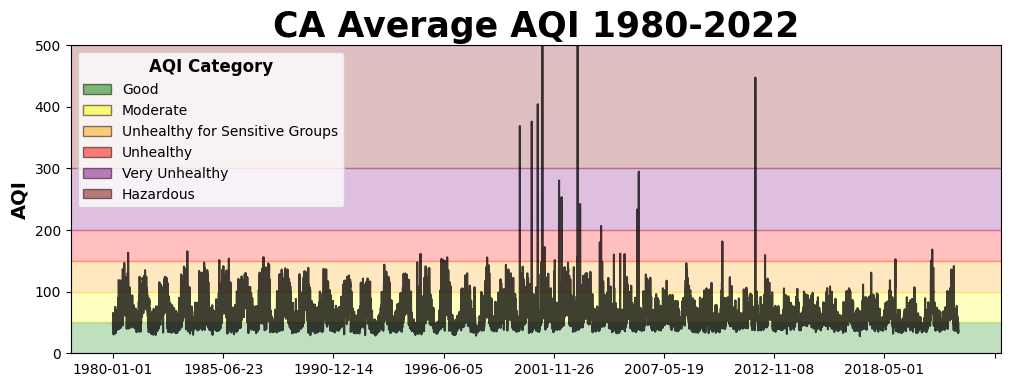

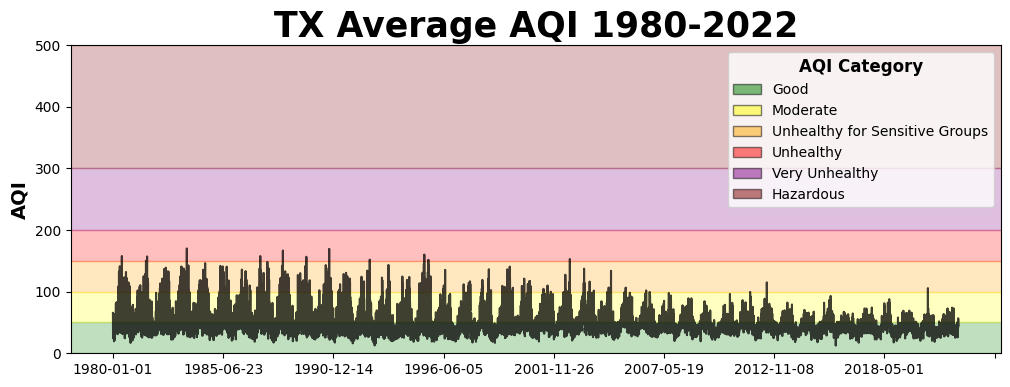

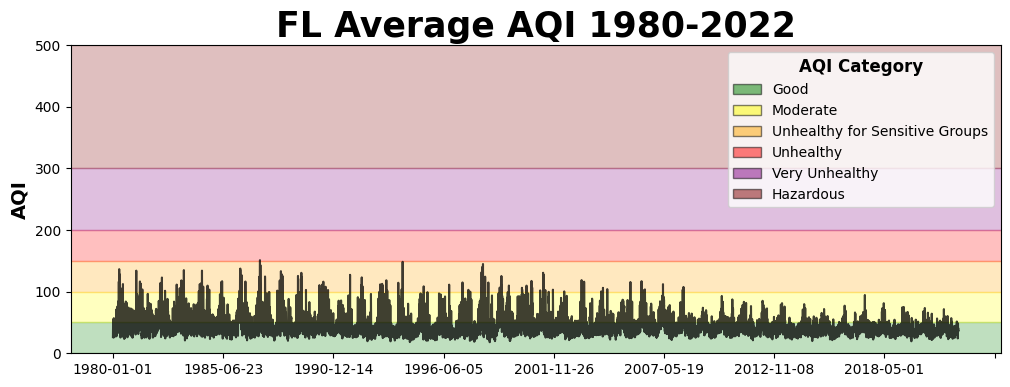

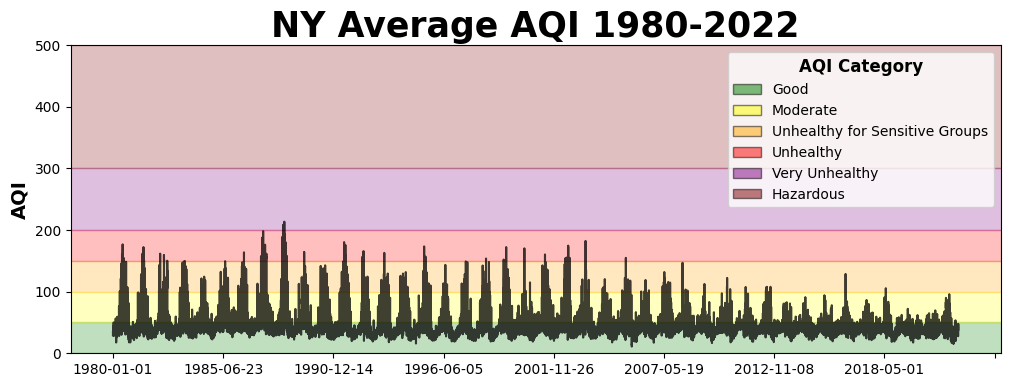

In [32]:
#Makes dataframe of US State AQI averages
aqi_by_state = aqi_data.groupby(['state_id', 'Date']).AQI.mean()

#plots AQI averages for each state listed
for state in ['CA', 'TX', 'FL', 'NY']:
    make_aqi_by_area_plot(aqi_by_state, state)


In [12]:
# Parte 8 
#function to plot aqi given an area
def make_aqi_by_area_plot(df, area, clip_dates=True):
    if clip_dates:
        data = df.unstack().loc[area, :"2022-01-01"]
    else:
        data = df.unstack().loc[area]
        
    data.plot(figsize=(12,4), color='black', alpha=0.75)
    
    
    plt.title(f'{area} Average AQI 1980-2022', {'size': 25, 'weight': 'bold'})

    # adds color patches 
    plt.gca().add_patch(copy(GOOD))
    plt.gca().add_patch(copy(MODERATE))
    plt.gca().add_patch(copy(UNHEALTHY_FOR_SENSITIVE))
    plt.gca().add_patch(copy(UNHEALTHY))
    plt.gca().add_patch(copy(VERY_UNHEALTHY))
    plt.gca().add_patch(copy(HAZARDOUS))

    plt.xlabel('')
    plt.ylabel('AQI', {'size': 14, 'weight': 'bold'})
    
    plt.ylim(0, 500)
    
    #sets up legend
    legend_elements = [
        Patch(facecolor='green', edgecolor='black', alpha=0.5, label='Good'),
        Patch(facecolor='yellow', edgecolor='black', alpha=0.5, label='Moderate'),
        Patch(facecolor='orange', edgecolor='black', alpha=0.5, label='Unhealthy for Sensitive Groups'),
        Patch(facecolor='red', edgecolor='black', alpha=0.5, label='Unhealthy'),
        Patch(facecolor='purple', edgecolor='black', alpha=0.5, label='Very Unhealthy'),
        Patch(facecolor='maroon', edgecolor='black', alpha=0.5, label='Hazardous'),
                      ]

    legend = plt.legend(handles=legend_elements)
    legend.set_title("AQI Category", prop = {'size':12, 'weight': 'bold'})
    
    #display plot
    plt.show()

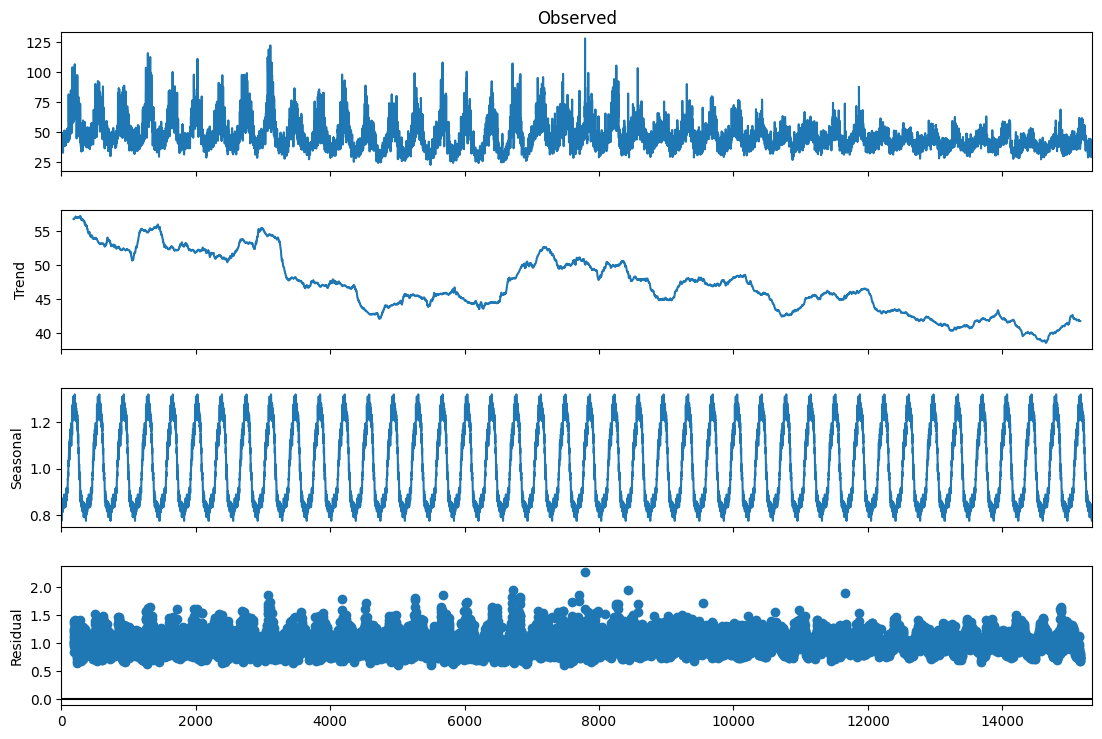

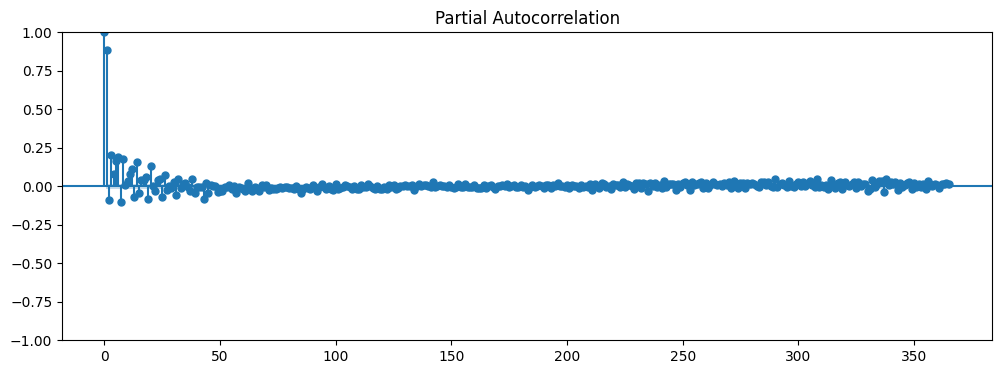

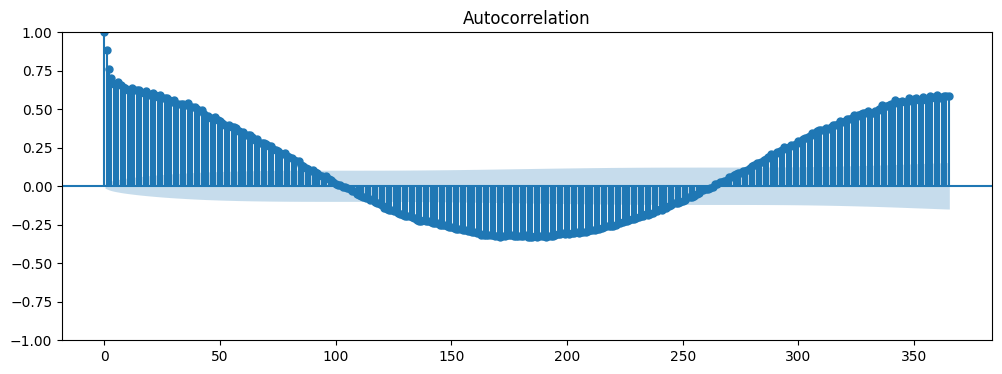

In [11]:
# Parte 7

# Importar las librerías necesarias
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Asegúrate de que los datos sean positivos antes de la descomposición
# Filtrar los valores negativos o cero
aqi_all_usa_clean = aqi_all_usa[aqi_all_usa > 0]

# Descomponer la serie temporal utilizando el modelo multiplicativo
seasonal_decompose(aqi_all_usa_clean.values, model='multiplicative', period=365).plot()
plt.gcf().set_figheight(8)
plt.gcf().set_figwidth(12)
plt.show()

# Graficar la función de autocorrelación parcial
plot_pacf(aqi_all_usa_clean.values, lags=365)
plt.gcf().set_figheight(4)
plt.gcf().set_figwidth(12)
plt.show()

# Graficar la función de autocorrelación
plot_acf(aqi_all_usa_clean.values, lags=365)
plt.gcf().set_figheight(4)
plt.gcf().set_figwidth(12)
plt.show()


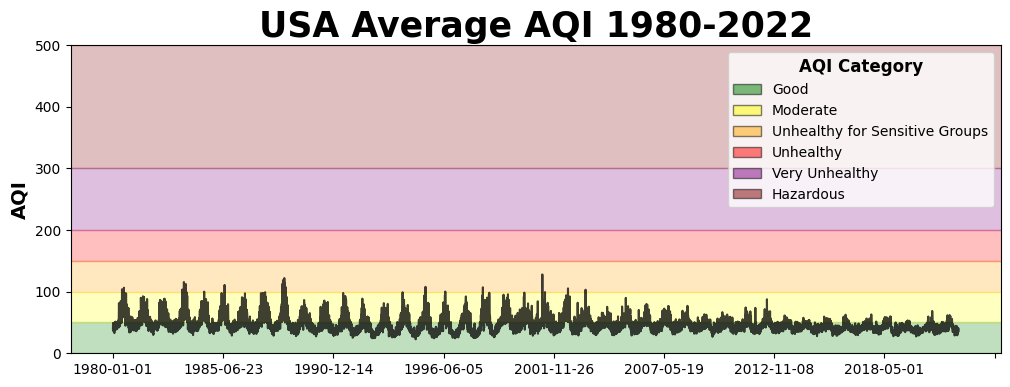

In [10]:
# Parte 6
#plots time series of US average AQI
aqi_all_usa = aqi_data.groupby('Date').AQI.mean().loc[:'2022-01-01']

aqi_all_usa.plot(figsize=(12,4), color='black', alpha=0.75)
plt.title('USA Average AQI 1980-2022', {'size': 25, 'weight': 'bold'})

# adds color patches 
plt.gca().add_patch(copy(GOOD))
plt.gca().add_patch(copy(MODERATE))
plt.gca().add_patch(copy(UNHEALTHY_FOR_SENSITIVE))
plt.gca().add_patch(copy(UNHEALTHY))
plt.gca().add_patch(copy(VERY_UNHEALTHY))
plt.gca().add_patch(copy(HAZARDOUS))

plt.xlabel('')
plt.ylabel('AQI', {'size': 14, 'weight': 'bold'})

plt.ylim(0, 500)

#Sets up legend
legend_elements = [
    Patch(facecolor='green', edgecolor='black', alpha=0.5, label='Good'),
    Patch(facecolor='yellow', edgecolor='black', alpha=0.5, label='Moderate'),
    Patch(facecolor='orange', edgecolor='black', alpha=0.5, label='Unhealthy for Sensitive Groups'),
    Patch(facecolor='red', edgecolor='black', alpha=0.5, label='Unhealthy'),
    Patch(facecolor='purple', edgecolor='black', alpha=0.5, label='Very Unhealthy'),
    Patch(facecolor='maroon', edgecolor='black', alpha=0.5, label='Hazardous'),
                  ]


legend = plt.legend(handles=legend_elements)
legend.set_title("AQI Category", prop = {'size':12, 'weight': 'bold'})

#displays the plot
plt.show()


In [9]:
#Parte 5

# Sets pathces for different aqi levels
from matplotlib.patches import Patch
from copy import copy

GOOD = plt.Rectangle((-1_000,0), 17_500, 50, fc='green',ec="green", alpha=0.25)
MODERATE = plt.Rectangle((-1_000,50), 17_500, 50, fc='yellow',ec="yellow", alpha=0.25)
UNHEALTHY_FOR_SENSITIVE = plt.Rectangle((-1_000,100), 17_500, 50,
                                                  fc='orange',ec="orange", alpha=0.25)
UNHEALTHY = plt.Rectangle((-1_000,150), 17_500, 50, fc='red',ec="red", alpha=0.25)
VERY_UNHEALTHY = plt.Rectangle((-1_000,200), 17_500, 100, fc='purple',ec="purple", alpha=0.25)
HAZARDOUS = plt.Rectangle((-1_000,300), 17_500, 200, fc='maroon',ec="maroon", alpha=0.25)

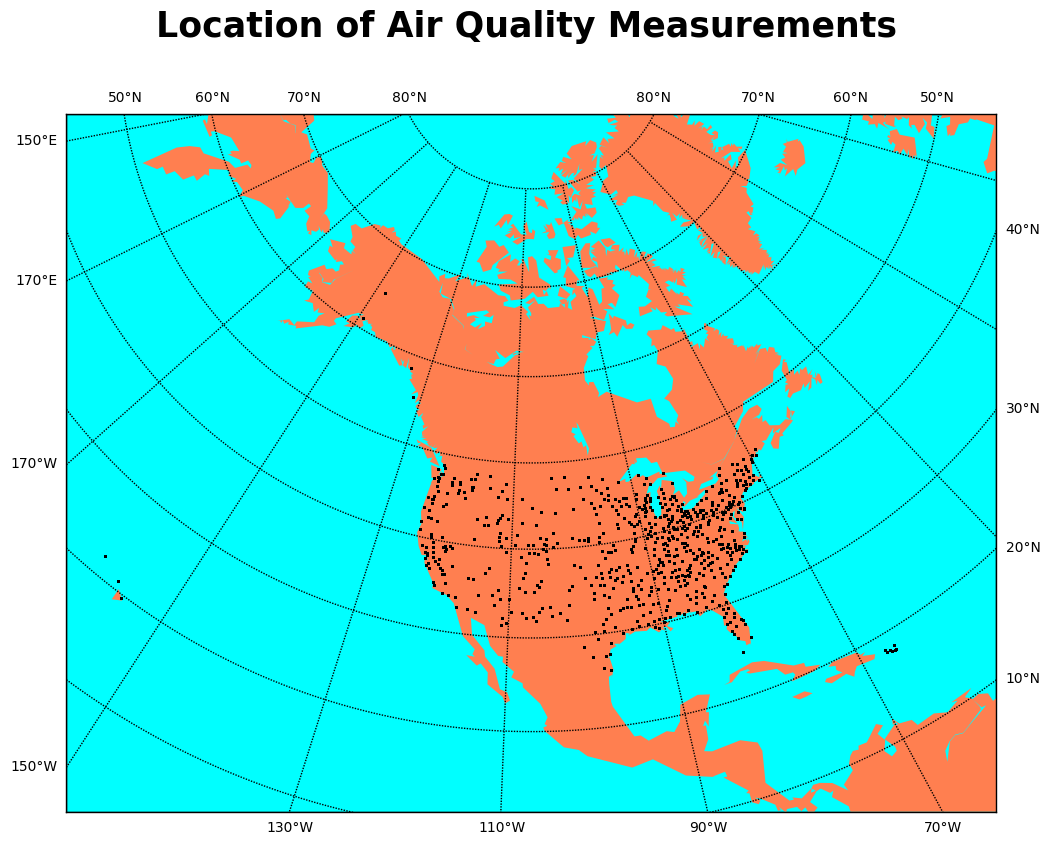

In [8]:
# Parte 3
#plots a map of sensor locations
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,12))
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
# draw a boundary around the map, fill the background.
# this background will end up being the ocean color, since
# the continents will be drawn on top.
m.drawmapboundary(fill_color='aqua')
# fill continents, set lake color same as ocean color.
m.fillcontinents(color='coral',lake_color='aqua')
# draw parallels and meridians.
# label parallels on right and top
# meridians on bottom and left
parallels = np.arange(0.,81,10.)
# labels = [left,right,top,bottom]
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(10.,351.,20.)
m.drawmeridians(meridians,labels=[True,False,False,True])
# convert to map projection coords.
# Note that lon,lat can be scalars, lists or numpy arrays.
xpt,ypt = m(aqi_data.lng.values,aqi_data.lat.values)
m.scatter(xpt,ypt, color='black', s=0.1)  # plot a blue dot there
plt.gcf().text(0.2, 0.85, 'Location of Air Quality Measurements', 
               {'size': 25, 'weight': 'bold'})
plt.show()

In [7]:
# Importar la librería
import tensorflow as tf
import pandas as pd
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from copy import copy
#plots time series statistics
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
#This cell plots the first measurement -> last measurement for each sensor
from datetime import timedelta, datetime
# Leer el dataset
aqi_data = pd.read_csv(r"C:\Users\andre\OneDrive\Documentos\TrabajoFinal-Grupo4CNN\US_AQI.csv", index_col=0)
# Pasandolo a parquet
# aqi_data.to_parquet("/kaggle/working/US_AQI_PARK.parquet") # cambiar por ruta de destino
# Configurar paralelismo para CPU
# tf.config.threading.set_inter_op_parallelism_threads(16)
# tf.config.threading.set_intra_op_parallelism_threads(16)
# aqi_data = pd.read_parquet("/kaggle/working/US_AQI_PARK.parquet")
strategy = tf.distribute.MirroredStrategy()

# Print out the number of devices available
print(f'Number of devices: {strategy.num_replicas_in_sync}')



# Muestra aleatoria de 200,000 filas
# aqi_data = aqi_data.sample(n=2000, random_state=42)

# Imprime un vistazo de la muestra
print("Sample of AQI Dataset:")
print(aqi_data.head())
# Verifica el número de filas con len
print(f"Number of rows (using len): {len(aqi_data)}")

#dataset summary statistics


# Convertir el DataFrame a formato Parquet y guardarlo
parquet_path = r"C:\Users\andre\OneDrive\Documentos\TrabajoFinal-Grupo4CNN\US_AQI.parquet"
aqi_data.to_parquet(parquet_path)
print(f"Archivo guardado en formato Parquet en: {parquet_path}")

# Leer el archivo Parquet
aqi_data_parquet = pd.read_parquet(parquet_path)
print("Archivo Parquet cargado:")
print(aqi_data_parquet.head())

# Opcional: verificar el número de filas en el archivo Parquet
print(f"Number of rows in Parquet file: {len(aqi_data_parquet)}")
aqi_data.describe()


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Number of devices: 1
Sample of AQI Dataset:
   CBSA Code        Date  AQI Category Defining Parameter  \
0      10140  2022-01-01   21     Good              PM2.5   
1      10140  2022-01-02   12     Good              PM2.5   
2      10140  2022-01-03   18     Good              PM2.5   
3      10140  2022-01-04   19     Good              PM2.5   
4      10140  2022-01-05   17     Good              PM2.5   

   Number of Sites Reporting city_ascii state_id  state_name      lat  \
0                          2   Aberdeen       WA  Washington  46.9757   
1                          2   Aberdeen       WA  Washington  46.9757   
2                          2   Aberdeen       WA  Washington  46.9757   
3                          2   Aberdeen       WA  Washington  46.9757   
4                          2   Aberdeen       WA  Washington  46.9757   

        lng  population  density             tim

,CBSA Code,AQI,Number of Sites Reporting,lat,lng,population,density
count,5.617325e+06,5.617325e+06,5.617325e+06,5.617325e+06,5.617325e+06,5.617325e+06,5.617325e+06
mean,3.028285e+04,4.665572e+01,3.650273e+00,3.849210e+01,-9.425695e+01,5.642292e+05,1.083637e+03
std,1.142715e+04,3.570811e+01,5.092484e+00,5.595372e+00,1.678664e+01,1.537382e+06,1.013632e+03
min,1.010000e+04,0.000000e+00,1.000000e+00,1.797430e+01,-1.593521e+02,1.903000e+03,4.000000e+00
25%,2.010000e+04,3.000000e+01,1.000000e+00,3.494420e+01,-1.069642e+02,2.843700e+04,5.250000e+02
50%,3.034000e+04,4.100000e+01,2.000000e+00,3.918860e+01,-8.893420e+01,1.225490e+05,8.340000e+02
75%,4.042000e+04,5.400000e+01,4.000000e+00,4.211550e+01,-8.154200e+01,3.913710e+05,1.255000e+03
max,4.974000e+04,2.064600e+04,7.200000e+01,6.483530e+01,-6.606100e+01,1.868002e+07,1.076800e+04
